In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
from keras.datasets import mnist
import numpy as np
from emnist import list_datasets
from emnist import extract_training_samples

In [2]:
'''
print(list_datasets())
(x_train,y_train), (x_test,y_test)=mnist.load_data()

x_train2=np.load("X.npy", mmap_mode=None)
y_train2=np.load("Y.npy", mmap_mode=None)

x_train3, y_train3 = extract_training_samples('digits')

print(x_train.shape,x_train2.shape)
x_train=np.concatenate((x_train,x_train2,x_train3))
y_train=np.concatenate((y_train,y_train2,y_train3))
np.save("X_full",x_train)
np.save("Y_full",y_train)
'''

'\nprint(list_datasets())\n(x_train,y_train), (x_test,y_test)=mnist.load_data()\n\nx_train2=np.load("X.npy", mmap_mode=None)\ny_train2=np.load("Y.npy", mmap_mode=None)\n\nx_train3, y_train3 = extract_training_samples(\'digits\')\n\nprint(x_train.shape,x_train2.shape)\nx_train=np.concatenate((x_train,x_train2,x_train3))\ny_train=np.concatenate((y_train,y_train2,y_train3))\nnp.save("X_full",x_train)\nnp.save("Y_full",y_train)\n'

In [4]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()
x_train=np.load("X_full.npy", mmap_mode=None)
y_train=np.load("Y_full.npy", mmap_mode=None)


#from emnist import extract_training_samples
#x_train, y_train = extract_training_samples('digits')
#x_train, y_train = extract_training_samples('byclass')
#x_train, y_train = extract_training_samples('letters')

num_classes=10+4 #10 цифр + 4 символа
input_shape = (28, 28, 1)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)


Train X=(475516, 28, 28), y=(475516, 14)
Train X=(475516, 28, 28), y=(475516, 14)
Test X=(10000, 28, 28), y=(10000, 14)
(28, 28)


In [5]:
model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu",use_bias=True),
        #layers.Dropout(0.1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",use_bias=True),
        #layers.Dropout(0.1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(256, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.Flatten(),
        #
        layers.Dense(num_classes, activation="softmax"),
    ]
 )
print(model.output_shape)
print(str(model.summary()))

(None, 14)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                             

In [6]:
model.compile(
    #SparseCategoricalCrossentropy - ужастно работает на EMnist. CategoricalCrossentropy + категории топчик.
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(),
    metrics=['categorical_accuracy']
    #metrics=['categorical_crossentropy']
)

In [30]:
#model.fit(x_train,y_train,batch_size=1,epochs=5,shuffle=True)

In [31]:
#Обучалка сейчас не нужна
'''print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model/MNIST_learn_epoch_start.h5")
for i in range(1,2):
    print("Epoch "+str(i))
    model.save('saved_model/MNIST_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=50,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
    print(str(results))
    model.save('saved_model/MNIST_learn_epoch_end='+str(i)+".h5")
model.save("saved_model/MNIST_learn_done.h5")'''

x_train= (475516, 28, 28) y_train (475516, 14)
Epoch 1
9511/9511 [==============================] - 156s 16ms/step - loss: 0.1168 - categorical_accuracy: 0.9780 - val_loss: 0.0627 - val_categorical_accuracy: 0.9839
200/200 - 1s - loss: 0.0627 - categorical_accuracy: 0.9839 - 945ms/epoch - 5ms/step
[0.06265668570995331, 0.9839000105857849]


In [7]:
#model.save('saved_model/MNIST_byclass_done2.h5')

In [7]:
model.load_weights('saved_model/MNIST_byclass_done2.h5')

['0.png', '1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


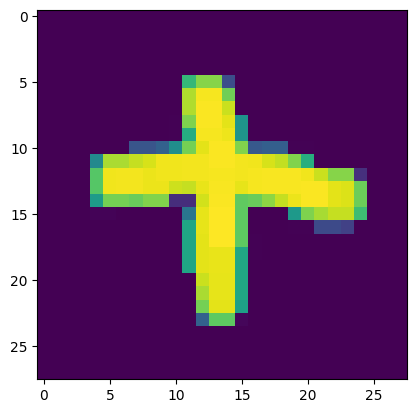

1/1 [==============================] - 6s 6s/step
+ for 0.png


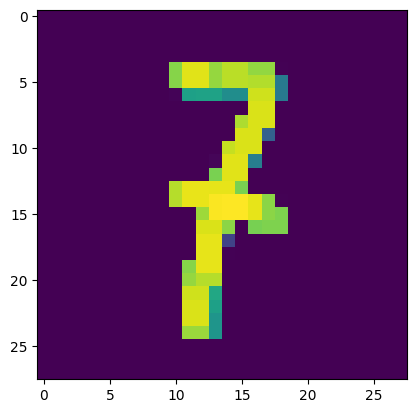

1/1 [==============================] - 0s 26ms/step
7 for 1.png


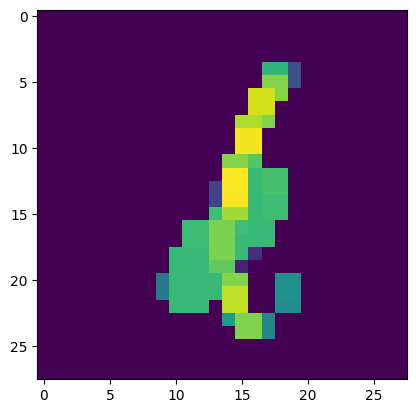

1/1 [==============================] - 0s 20ms/step
1 for 2.png


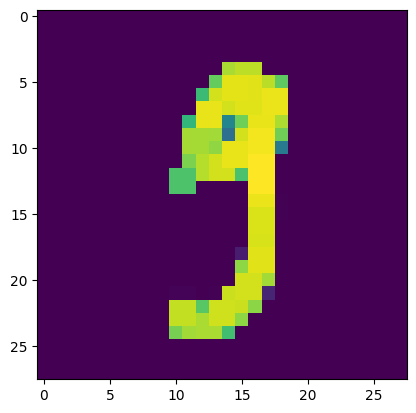

1/1 [==============================] - 0s 20ms/step
9 for 3.png


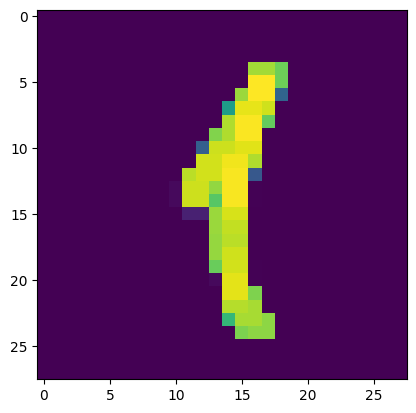

1/1 [==============================] - 0s 20ms/step
1 for 4.png


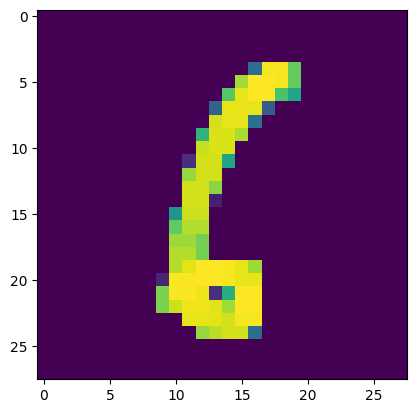

1/1 [==============================] - 0s 20ms/step
6 for 5.png


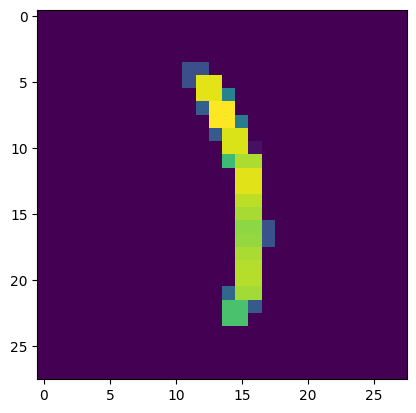

1/1 [==============================] - 0s 21ms/step
1 for 6.png


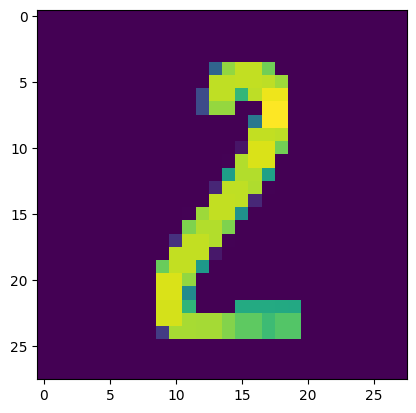

1/1 [==============================] - 0s 21ms/step
2 for 7.png


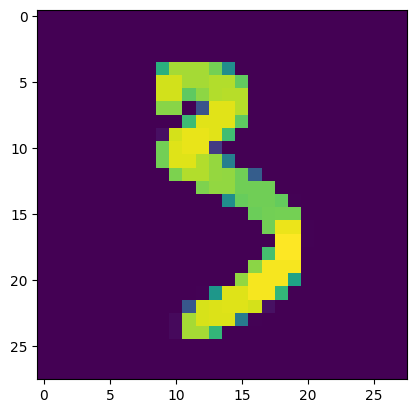

1/1 [==============================] - 0s 21ms/step
3 for 8.png


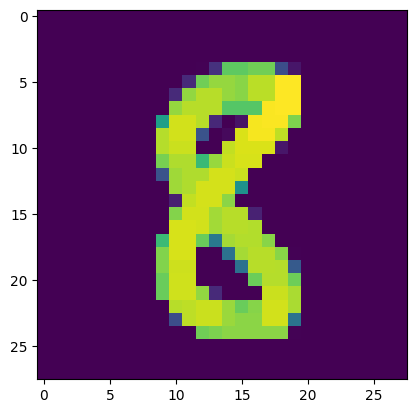

1/1 [==============================] - 0s 20ms/step
8 for 9.png


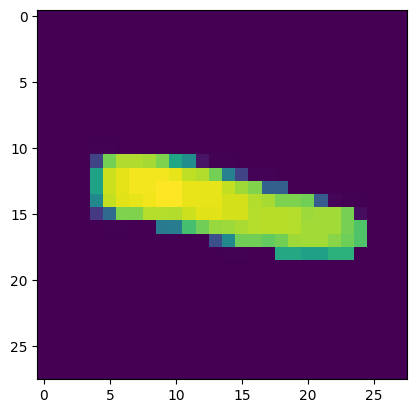

1/1 [==============================] - 0s 20ms/step
- for 10.png


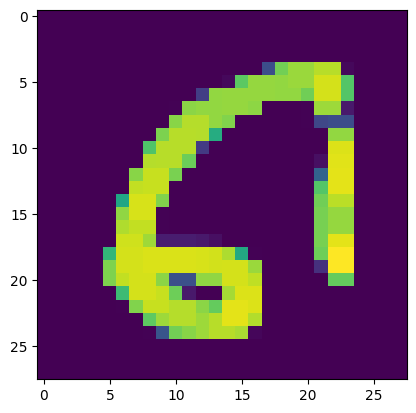

1/1 [==============================] - 0s 21ms/step
6 for 11.png


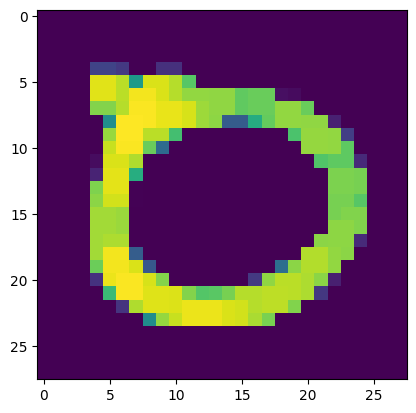

1/1 [==============================] - 0s 19ms/step
0 for 12.png


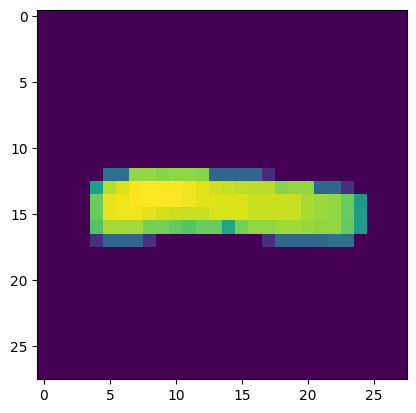

1/1 [==============================] - 0s 21ms/step
- for 13.png


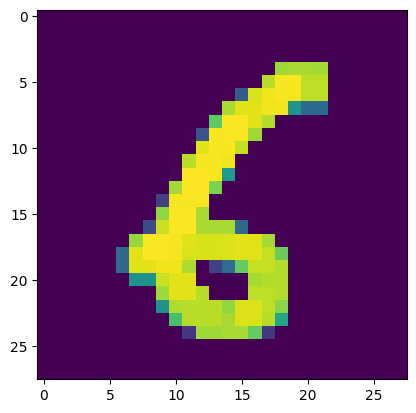

1/1 [==============================] - 0s 21ms/step
6 for 14.png


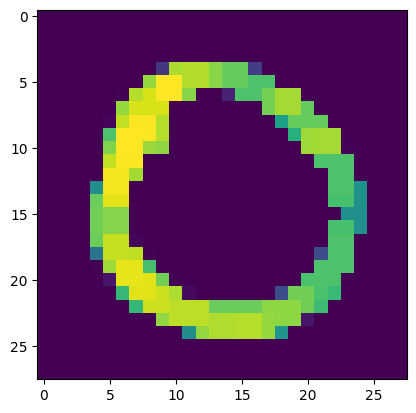

1/1 [==============================] - 0s 21ms/step
0 for 15.png
Recognized=['+', '7', '1', '9', '1', '6', '1', '2', '3', '8', '-', '6', '0', '-', '6', '0']
Cuted=['7', '9', '1', '6', '2', '3', '8', '6', '0', '6', '0']


In [8]:
from PIL import Image
#model.save('saved_model_MNIST_Dense/MNIST_byclass_done.h5')

IDtoName={
0:"0",
1:"1",
2:"2",
3:"3",
4:"4",
5:"5",
6:"6",
7:"7",
8:"8",
9:"9",
10:"-",
11:"(",
12:")",
13:"+",
         }
NameToID={
"0":0,
"1":1,
"2":2,
"3":3,
"4":4,
"5":5,
"6":6,
"7":7,
"8":8,
"9":9,
"-":10,
"(":11,
")":12,
"+":13,
         }
def Recognize(model,image,size=28):
    IMG = np.asarray(image)
    IMG_2 = tf.keras.preprocessing.image.img_to_array(IMG)
    OneChannelImage=np.zeros((28,28))
    
    for y in range(size):
        for x in range(size):
            OneChannelImage[y][x]=IMG_2[y][x][0]
    
    plt.imshow(OneChannelImage)
    
    plt.show()
    
    ReadyIMG=OneChannelImage.reshape(1,size,size)/255.
    #print(model.predict(ReadyIMG,batch_size=1))
    return IDtoName[model.predict(ReadyIMG,batch_size=1).argmax()]

def SortKey(x):
    name,img=x
    return int(name[:-4])
    
def RecognizeInFolder(folderPath,model):
    from os import walk

    files = []
    for (dirpath, dirnames, filenames) in walk(folderPath):
        files.extend(filenames)
        #print(filenames)
        #break
    print(files)
    ImagesTouples=[]
    #ImagesNames=[]
    for name in files:
        #ImagesNames.append(name)
        #Images.append(ReadImage(folderPath+name))
        ImagesTouples.append((name,ReadImage(folderPath+name)))
    #print(Images)
    ImagesTouples.sort(key=SortKey)
    Results=[]
    for id in range(len(ImagesTouples)):
        ImageName,Image=ImagesTouples[id]
        result=Recognize(model,Image)
        Results.append(result)
        print(result+" for "+ImageName)
    return Results
def ReadImage(path):
    return Image.open(path)
Results=RecognizeInFolder("./DataToRecognize/",model)
#Results2=Results[]
print("Recognized="+str(Results))
#Удаляем не форматные символы из номера
Results.pop(13)
Results.pop(10)
Results.pop(6)
Results.pop(2)
Results.pop(0)
print("Cuted="+str(Results))

In [9]:
'''

from PIL import Image
IMG = np.asarray(Image.open('../2022.10.07/Segmented/9.png'))

plt.imshow(IMG)
plt.show()
print(IMG.shape)

IMG_2=np.zeros((1,28,28),dtype="float32")

for x in range(28):
    for y in range(28):
        IMG_2[0][x][y]=IMG[x][y][0]/255.
print(IMG_2.shape)
print(model.predict(IMG_2,batch_size=1).argmax())
'''

'\n\nfrom PIL import Image\nIMG = np.asarray(Image.open(\'../2022.10.07/Segmented/9.png\'))\n\nplt.imshow(IMG)\nplt.show()\nprint(IMG.shape)\n\nIMG_2=np.zeros((1,28,28),dtype="float32")\n\nfor x in range(28):\n    for y in range(28):\n        IMG_2[0][x][y]=IMG[x][y][0]/255.\nprint(IMG_2.shape)\nprint(model.predict(IMG_2,batch_size=1).argmax())\n'